In [5]:
#imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.spatial import cKDTree
print('done')

done


In [6]:

# Setting up initial parameters
class Initial_Parameters:
    def __init__(self, L=42, rho=1, r=1, dt=1, v=0.5, eta=0.23, total_time=100, random_seed=2):
        self.L = L
        self.rho = rho
        self.r = r
        self.dt = dt
        self.v = v
        self.eta = eta
        self.total_time = total_time
        self.random_seed = random_seed
        self.N = int(rho * L**2)



In [7]:
p = Initial_Parameters()
np.random.seed(p.random_seed)

# Initialize particle positions and orientations
pos = np.random.uniform(0, p.L, (p.N, 2))
theta = 2 * np.pi * np.random.rand(p.N)  # Random initial orientation



Text(0.5, 1.0, 'Vicsek Model Simulation')

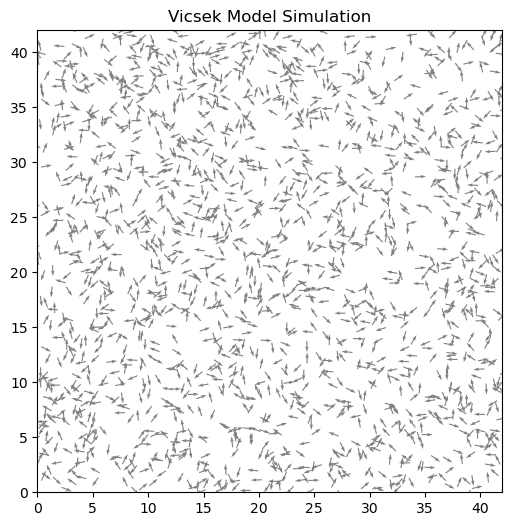

In [8]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(6, 6))
quiver = ax.quiver(pos[:, 0], pos[:, 1], 
                   np.cos(theta), np.sin(theta), 
                   angles='xy', scale_units='xy', scale=1, color='gray')
ax.set_xlim(0, p.L)
ax.set_ylim(0, p.L)
ax.set_title('Vicsek Model Simulation')

In [9]:
# Animation function
def update(frame):
    global pos, theta

    # Find neighbors
    tree = cKDTree(pos)
    neighbors = tree.query_ball_tree(tree, p.r)

    # Update orientations based on neighbors
    sines = np.zeros(p.N)
    cosines = np.zeros(p.N)
    for i, indices in enumerate(neighbors):
        sines[i] = np.sum(np.sin(theta[indices]))
        cosines[i] = np.sum(np.cos(theta[indices]))
    
    # Add noise and compute new orientation
    noise = p.eta * (np.random.rand(p.N) - 0.5) * 2 * np.pi
    theta = np.arctan2(sines, cosines) + noise

    # Update velocities
    v_x = p.v * np.cos(theta)
    v_y = p.v * np.sin(theta)

    # Update positions with periodic boundary conditions
    pos[:, 0] = (pos[:, 0] + v_x * p.dt) % p.L
    pos[:, 1] = (pos[:, 1] + v_y * p.dt) % p.L

    # Update quiver plot
    quiver.set_offsets(pos)
    quiver.set_UVC(np.cos(theta), np.sin(theta))
    return quiver,

# Create the animation
ani = FuncAnimation(fig, update, frames=p.total_time, interval=50, blit=True)

# Show the animation
plt.show()

from IPython.display import HTML
HTML(ani.to_html5_video())